In [1]:
import pandas as pd
df=pd.read_csv('dataset.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the 
numerical features if necessary.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
x=df.iloc[:,:-1]
y=df['target']

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each 
tree. Use the default values for other hyperparameters.

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [9]:
y_pred=rfc.predict(X_test)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 

In [10]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.8351648351648352
0.9148936170212766
0.7962962962962963
0.31681681681681684


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart 
disease risk. Visualise the feature importances using a bar chart

Text(0.5, 0, 'Feature Importance')

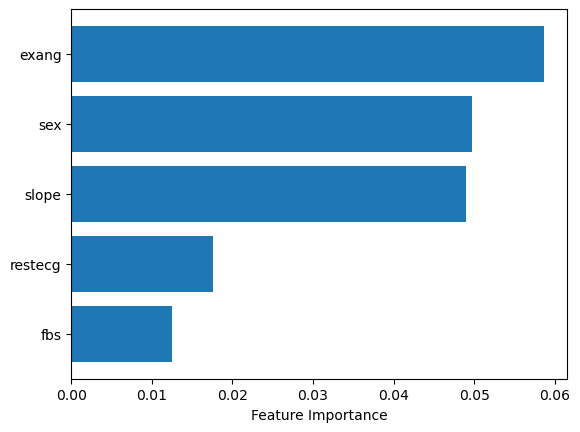

In [11]:
import matplotlib.pyplot as plt
sort = rfc.feature_importances_.argsort()
plt.barh(df.columns[sort][0:5], rfc.feature_importances_[sort][0:5])
plt.xlabel("Feature Importance")

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try 
different values of the number of trees, maximum depth, minimum samples split, and minimum samples 
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [12]:
from sklearn.model_selection import GridSearchCV
rfc1=RandomForestClassifier()
para={'n_estimators':[100,110,120,125,130],
      'max_depth':[5,6,7,8,9,10],
      'min_samples_split':[1,2,3,4,5],
      'min_samples_leaf':[0,1,2,3,4]

}
gscv=GridSearchCV(rfc1,param_grid=para)

In [13]:
gscv.fit(X_train,y_train)



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
750 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/u

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 110, 120, 125, 130]})

Q7. Report the best set of hyperparameters found by the search and the corresponding performance 
metrics. Compare the performance of the tuned model with the default model.

In [14]:
y_pre=gscv.predict(X_test)

In [16]:
gscv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 110}

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score
print(accuracy_score(y_pre,y_test))
print(precision_score(y_pre,y_test))
print(recall_score(y_pre,y_test))
print(r2_score(y_pre,y_test))

0.8131868131868132
0.8936170212765957
0.7777777777777778
0.2257257257257257


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the 
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and 
limitations of the model for predicting heart disease risk.

<AxesSubplot: xlabel='sex', ylabel='exang'>

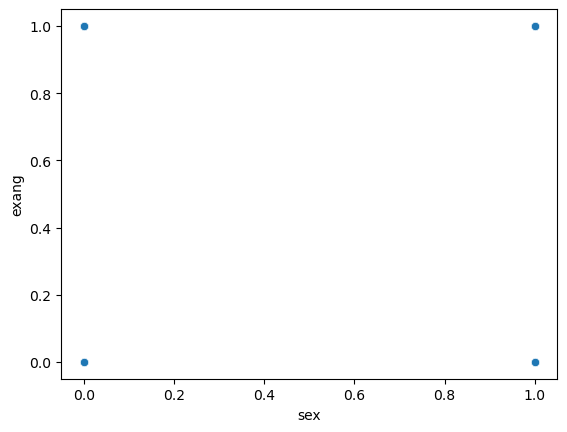

In [25]:
import seaborn as sns
sns.scatterplot(y='exang',x='sex',data=df)

In [28]:
df['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [27]:
df['exang']

(0      0
 1      0
 2      0
 3      0
 4      1
       ..
 298    1
 299    0
 300    0
 301    1
 302    0
 Name: exang, Length: 303, dtype: int64,
 0      1
 1      1
 2      0
 3      1
 4      0
       ..
 298    0
 299    1
 300    1
 301    1
 302    0
 Name: sex, Length: 303, dtype: int64)